In [40]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import rescale
from matplotlib import cm
from skimage.feature import match_template



In [41]:
def show(img, cmap=None):
  plt.imshow(img) if cmap is None else plt.imshow(img, cmap=cmap)
  plt.show()

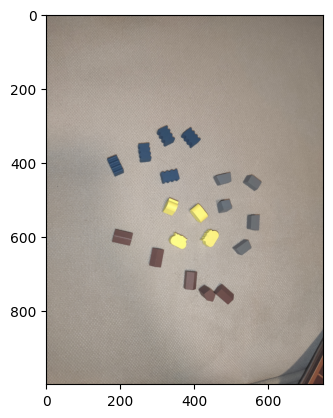

In [60]:
%matplotlib inline
img = cv.imread('resources/resources5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.uint8(rescale(img, (0.25,0.25,1))*255)

plt.imshow(img)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

## Color sigmentation for stars

In [70]:
from ipywidgets import IntSlider, interact

hue_min = IntSlider(value=-255, min=-255, max=255, step=1, continuous_update=False)
hue_max = IntSlider(value=255, min=-255, max=255, step=1, continuous_update=False)
lit_min = IntSlider(value=-255, min=-255, max=255, step=1, continuous_update=False)
lit_max = IntSlider(value=255, min=-255, max=255, step=1, continuous_update=False)
sat_min = IntSlider(value=-255, min=-255, max=255, step=1, continuous_update=False)
sat_max = IntSlider(value=255, min=-255, max=255, step=1, continuous_update=False)

def mask_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max):
  img_hsv_calibrated = img_hsv - np.median(img_hsv, axis=(0,1))
  mask = cv.inRange(img_hsv_calibrated, (hue_min,lit_min,sat_min),(hue_max,lit_max,sat_max))
  result = cv.bitwise_and(img, img, mask=mask)
  # plt.figure(dpi=200)
  plt.subplot(2,2,1)
  plt.imshow(img)
  plt.title('image ')
  plt.axis('off')
  plt.subplot(2,2,2)
  plt.imshow(result)
  plt.title('masked ')
  plt.axis('off')
  plt.subplot(2,2,3)
  plt.imshow(mask)
  plt.title('mask ')
  plt.axis('off')
  plt.show()
  return mask


r_min = IntSlider(value=-255, min=-255, max=255, step=1, continuous_update=False)
r_max = IntSlider(value=255, min=-255, max=255, step=1, continuous_update=False)
g_min = IntSlider(value=-255, min=-255, max=255, step=1, continuous_update=False)
g_max = IntSlider(value=255, min=-255, max=255, step=1, continuous_update=False)
b_min = IntSlider(value=-255, min=-255, max=255, step=1, continuous_update=False)
b_max = IntSlider(value=255, min=-255, max=255, step=1, continuous_update=False)

def mask_rgb(r_min,r_max,g_min,g_max,b_min,b_max):

  mask = cv.inRange(img, (r_min,g_min,b_min),(r_max,g_max,b_max))
  result = cv.bitwise_and(img, img, mask=mask)
  # plt.figure(dpi=200)
  plt.subplot(2,2,1)
  plt.imshow(img)
  plt.title('image ')
  plt.axis('off')
  plt.subplot(2,2,2)
  plt.imshow(result)
  plt.title('masked ')
  plt.axis('off')
  plt.subplot(2,2,3)
  plt.imshow(mask)
  plt.title('mask ')
  plt.axis('off')
  plt.show()
  return result

In [52]:
# %matplotlib inline
# interact(mask_rgb, r_min=r_min,r_max=r_max,g_min=g_min,
#          g_max=g_max,b_min=b_min,b_max=b_max);

In [64]:
%matplotlib inline
result = interact(mask_hsv, hue_min=hue_min,hue_max=hue_max,lit_min=lit_min,
         lit_max=lit_max,sat_min=sat_min,sat_max=sat_max);

interactive(children=(IntSlider(value=-255, continuous_update=False, description='hue_min', max=255, min=-255)…

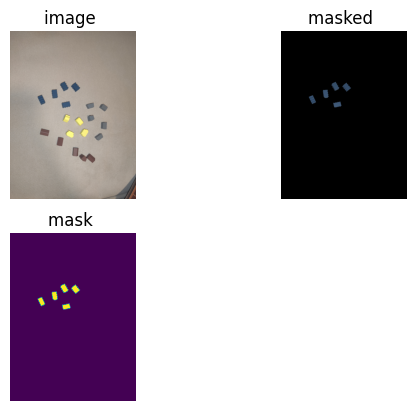

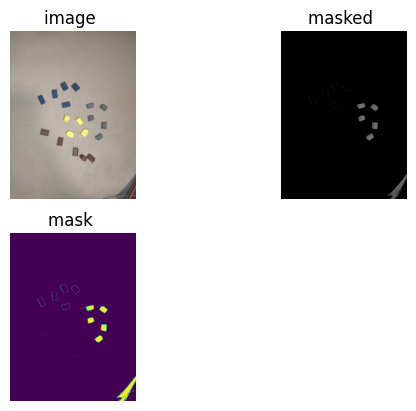

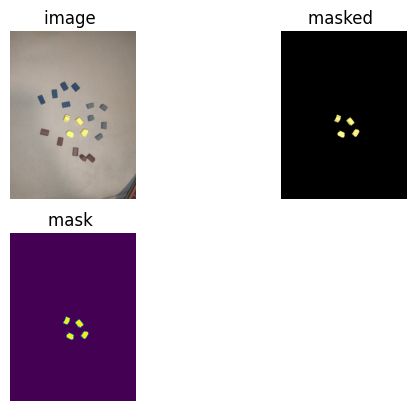

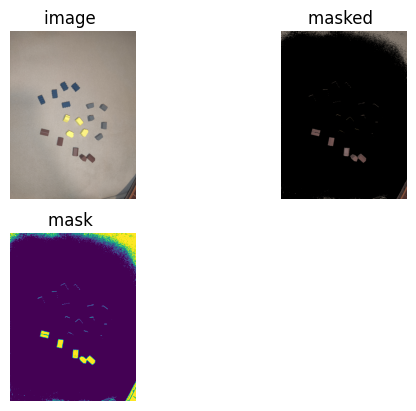

In [71]:
# hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
#       35, 158, 32, 153, 0, 106
# blue = mask_coins_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max)

# hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
#   0, 52, 0, 35, 57, 157
# gray = mask_coins_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max)

# hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
#   0, 255, 84, 255, 163, 255
# yellow = mask_coins_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max);

# hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
#   0,13,78,139,97,174
# brown = mask_coins_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max);

hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
  42, 255, 61, 255, -255, 255
blue = mask_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max)

hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
  20, 255, -68, 19, -255, -36
gray = mask_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max)

hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
  -255, 25, 43, 255, 34, 255
yellow = mask_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max);

hue_min,hue_max,lit_min,lit_max,sat_min,sat_max = \
  -104,9,6,255,-255,-25
brown = mask_hsv(hue_min,hue_max,lit_min,lit_max,sat_min,sat_max);

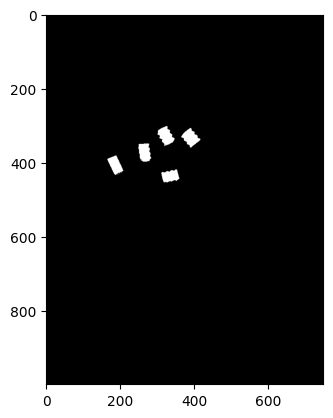

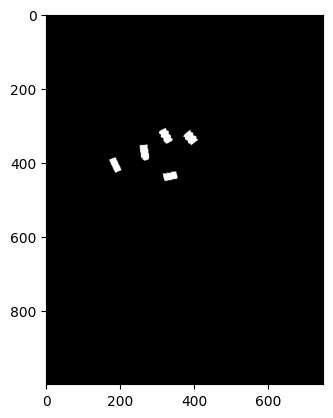

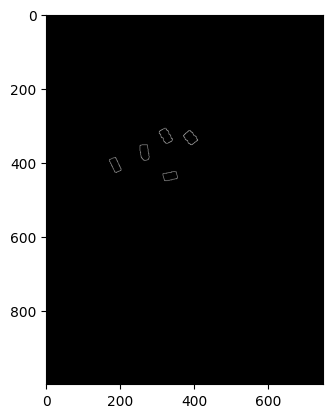

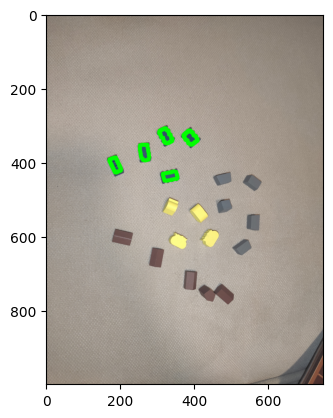

blue: n_contours=5, mean_area=338.20, max_area=846.0, min_area=24.5
blue: n_contours=5, mean_len=191.49, max_len=248.01, min_len=115.11


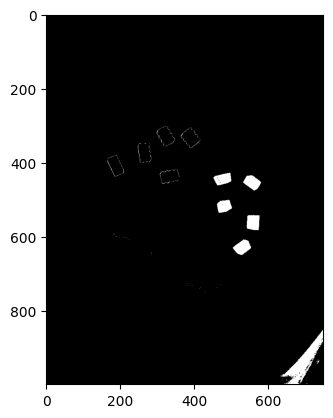

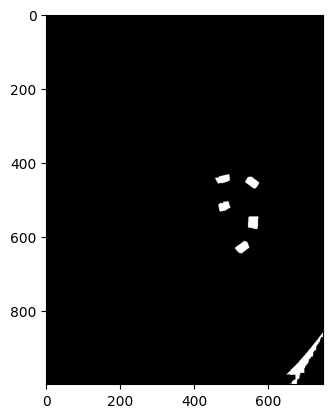

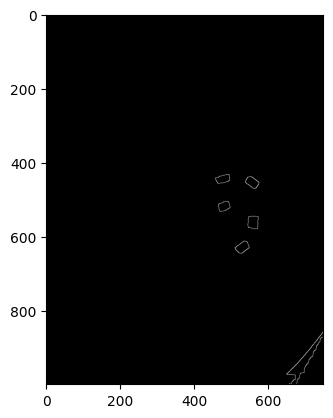

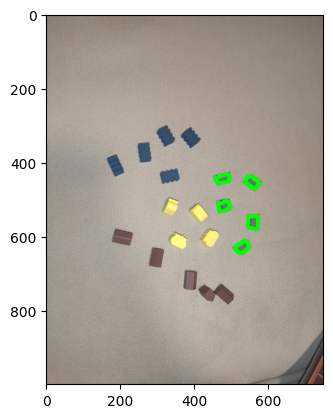

gray: n_contours=5, mean_area=735.30, max_area=846.0, min_area=632.0
gray: n_contours=5, mean_len=110.37, max_len=116.97, min_len=101.60


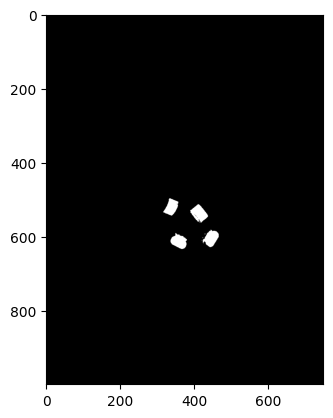

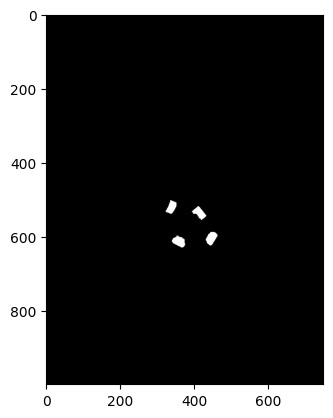

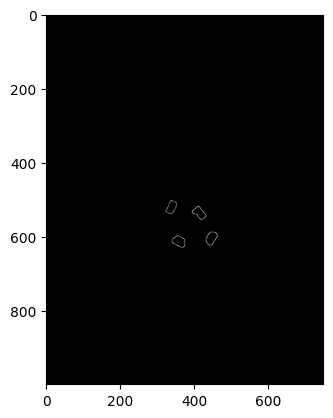

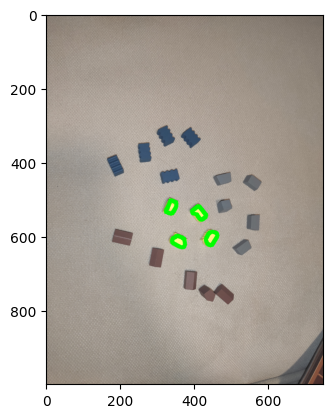

yellow: n_contours=4, mean_area=563.88, max_area=756.5, min_area=20.5
yellow: n_contours=4, mean_len=136.72, max_len=209.24, min_len=109.64


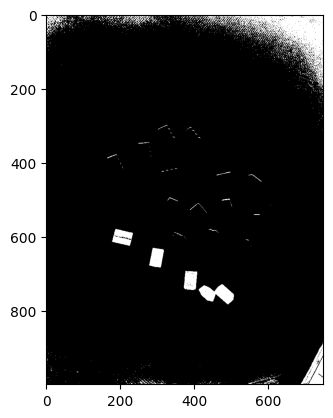

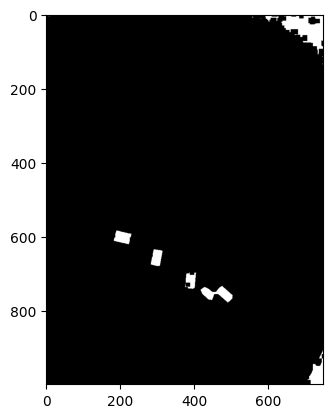

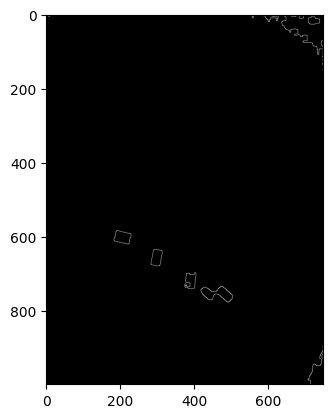

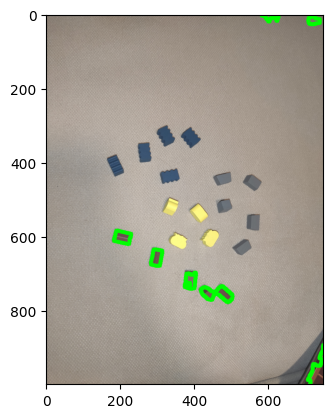

brown: n_contours=8, mean_area=693.75, max_area=1885.0, min_area=9.0
brown: n_contours=8, mean_len=160.93, max_len=247.71, min_len=77.94


In [93]:
def is_bound_box_ratio_good(contour):
    cv.boxPoints(cv.minAreaRect(contour))
    _,_,w,h = cv.boundingRect(contour)
    return h !=0 and w !=0 and 0.2<w/h<5

for color, colorname in zip([blue,gray,yellow, brown],['blue','gray','yellow','brown']):
  # gray_ = cv.cvtColor(color, cv.COLOR_RGB2GRAY)
  show(color, 'gray')
  gray_ = cv.morphologyEx(color, cv.MORPH_OPEN, np.ones((7,7)))
  gray_ = cv.morphologyEx(gray_, cv.MORPH_CLOSE, np.ones((5,5)))
  gray_ = cv.morphologyEx(gray_, cv.MORPH_ERODE, np.ones((7,7)))
  show(gray_, 'gray')
  blurred = cv.GaussianBlur(gray_, ksize=(9,9),sigmaX=0,sigmaY=0)
  edges = cv.Canny(blurred, 15, 120)
  show(edges,'gray')
  contours, hierarchy = cv.findContours(edges,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
  cont_areas =[]
  cont_lens = []
  img_cont = img.copy()
  contours = list(filter(lambda x: cv.arcLength(x, closed=True)>50,contours))
  contours = list(filter(lambda x: cv.arcLength(x, closed=True)<300,contours))
  contours = list(filter(lambda x: cv.contourArea(x)>5,contours))
  # contours = list(filter(lambda x: cv.contourArea(x)<3000,contours))
  contours = list(filter(is_bound_box_ratio_good,contours))
  
  for contour in contours:
    cont_area = cv.contourArea(contour)
    cont_areas.append(cont_area)
    cont_len = cv.arcLength(contour, closed=True)
    cont_lens.append(cont_len)
  cv.drawContours(img_cont, contours, -1, (0, 255,0),10)
  show(img_cont)
  if len(cont_areas) !=0:
    mean_area = np.mean(cont_areas)
    min_area = np.min(cont_areas)
    max_area = np.max(cont_areas)
    mean_len = np.mean(cont_lens)
    min_len = np.min(cont_lens)
    max_len = np.max(cont_lens)
  else:
    mean_area = 0
    min_area = 0
    max_area = 0
    mean_len = 0
    min_len = 0
    max_len = 0

  print(f'{colorname}: n_contours={len(contours)}, {mean_area=:5.2f}, {max_area=}, {min_area=}')
  print(f'{colorname}: n_contours={len(contours)}, {mean_len=:5.2f}, {max_len=:5.2f}, {min_len=:5.2f}')